In [171]:
# Import needed Librarys
import pandas as pd
import math, datetime
import numpy as np
import cufflinks as cf
import json as j
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
%matplotlib inline

from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go


from plotly.graph_objs import *
py.sign_in('MamaAlpha', 'DU0oTGDdZtzP87TkH9k7')
plotly.tools.set_credentials_file(username='MamaAlpha', api_key='DU0oTGDdZtzP87TkH9k7')  

from mpl_toolkits.mplot3d import Axes3D




In [172]:
date=pd.date_range(start="1/1/2018", end="1/30/2019", freq="M")
date

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [173]:
values = [  { "Mot_clé":"Robe", 'cpc':700, 'nombre d''impression':100, 'position moyenne':3,'volume de recherche':1200, 'nombre de clic':905},
            { "Mot_clé":"Robe",'cpc':1000, 'nombre d''impression':375, 'position moyenne':3,'volume de recherche':1300, 'nombre de clic':880}, 
            { "Mot_clé":"Robe",'cpc':1500, 'nombre d''impression':500, 'position moyenne':2,'volume de recherche':4300, 'nombre de clic':3000},
            { "Mot_clé":"Robe",'cpc':1500, 'nombre d''impression':600, 'position moyenne':3,'volume de recherche':5000, 'nombre de clic':2300},
            { "Mot_clé":"Robe",'cpc':1800, 'nombre d''impression':300, 'position moyenne':2,'volume de recherche':4500, 'nombre de clic':1500},
            { "Mot_clé":"Robe",'cpc':1900, 'nombre d''impression':500, 'position moyenne':7,'volume de recherche':5000, 'nombre de clic':1700},
            { "Mot_clé":"Robe",'cpc':3000, 'nombre d''impression':900, 'position moyenne':2,'volume de recherche':7000, 'nombre de clic':5000},
            { "Mot_clé":"Robe",'cpc':3000, 'nombre d''impression':700, 'position moyenne':4,'volume de recherche':10000,'nombre de clic':5050},
            { "Mot_clé":"Robe",'cpc':3500, 'nombre d''impression':800, 'position moyenne':2,'volume de recherche':15000,'nombre de clic':10000},
            { "Mot_clé":"Robe",'cpc':3000, 'nombre d''impression':500, 'position moyenne':1,'volume de recherche':12300,'nombre de clic':9000},
            { "Mot_clé":"Robe",'cpc':200,  'nombre d''impression':30,  'position moyenne':5,'volume de recherche':2800, 'nombre de clic':1000},
            { "Mot_clé":"Robe",'cpc':1000, 'nombre d''impression':35,  'position moyenne':1,'volume de recherche':2500, 'nombre de clic':900},]
Robe = pd.DataFrame(values,date)
Robe

,Mot_clé,cpc,nombre de clic,nombre dimpression,position moyenne,volume de recherche
2018-01-31,Robe,700,905,100,3,1200
2018-02-28,Robe,1000,880,375,3,1300
2018-03-31,Robe,1500,3000,500,2,4300
2018-04-30,Robe,1500,2300,600,3,5000
2018-05-31,Robe,1800,1500,300,2,4500
2018-06-30,Robe,1900,1700,500,7,5000
2018-07-31,Robe,3000,5000,900,2,7000
2018-08-31,Robe,3000,5050,700,4,10000
2018-09-30,Robe,3500,10000,800,2,15000
2018-10-31,Robe,3000,9000,500,1,12300


In [174]:
Robe.columns

Index(['Mot_clé', 'cpc', 'nombre de clic', 'nombre dimpression',
       'position moyenne', 'volume de recherche'],
      dtype='object')

In [175]:
data = [go.Scatter(x=Robe.index, y=Robe['cpc'])]

py.iplot(data, filename = 'time-series-simple')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~MamaAlpha/0 or inside your plot.ly account where it is named 'time-series-simple'


C:\Users\mad\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [176]:
values = [  { "Mot_clé":"vacances",'cpc':10,  'nombre d''impression':100, 'position moyenne':7,'volume de recherche':900,   'nombre de clic':150},
            { "Mot_clé":"vacances",'cpc':15,  'nombre d''impression':95,  'position moyenne':5,'volume de recherche':810,   'nombre de clic':400}, 
            { "Mot_clé":"vacances",'cpc':100, 'nombre d''impression':500, 'position moyenne':2,'volume de recherche':2700,  'nombre de clic':2000},
            { "Mot_clé":"vacances",'cpc':24,  'nombre d''impression':80,  'position moyenne':7,'volume de recherche':400,   'nombre de clic':504},
            { "Mot_clé":"vacances",'cpc':32,  'nombre d''impression':50,  'position moyenne':7,'volume de recherche':405,   'nombre de clic':450},
            { "Mot_clé":"vacances",'cpc':2500,'nombre d''impression':500, 'position moyenne':2,'volume de recherche':12000, 'nombre de clic':34567},
            { "Mot_clé":"vacances",'cpc':3700,'nombre d''impression':390, 'position moyenne':1,'volume de recherche':13906, 'nombre de clic':23456},
            { "Mot_clé":"vacances",'cpc':1000,'nombre d''impression':600, 'position moyenne':1,'volume de recherche':78000, 'nombre de clic':25000},
            { "Mot_clé":"vacances",'cpc':120, 'nombre d''impression':135, 'position moyenne':2,'volume de recherche':3000,  'nombre de clic':35},
            { "Mot_clé":"vacances",'cpc':78,  'nombre d''impression':200, 'position moyenne':4,'volume de recherche':2000,  'nombre de clic':32},
            { "Mot_clé":"vacances",'cpc':15,  'nombre d''impression':65,  'position moyenne':2,'volume de recherche':600,   'nombre de clic':20},
            { "Mot_clé":"vacances",'cpc':64,  'nombre d''impression':134, 'position moyenne':7,'volume de recherche':50,    'nombre de clic':120},]
vacances = pd.DataFrame(values,date)
vacances

,Mot_clé,cpc,nombre de clic,nombre dimpression,position moyenne,volume de recherche
2018-01-31,vacances,10,150,100,7,900
2018-02-28,vacances,15,400,95,5,810
2018-03-31,vacances,100,2000,500,2,2700
2018-04-30,vacances,24,504,80,7,400
2018-05-31,vacances,32,450,50,7,405
2018-06-30,vacances,2500,34567,500,2,12000
2018-07-31,vacances,3700,23456,390,1,13906
2018-08-31,vacances,1000,25000,600,1,78000
2018-09-30,vacances,120,35,135,2,3000
2018-10-31,vacances,78,32,200,4,2000


In [177]:
data = [go.Scatter(x=vacances.index, y=vacances['cpc'])]

py.iplot(data, filename = 'time-series-simple')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~MamaAlpha/0 or inside your plot.ly account where it is named 'time-series-simple'


C:\Users\mad\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [178]:
values = [  { "Mot_clé": "education",'cpc' :5690,'nombre d''impression':100, 'position moyenne':3,'volume de recherche':9000, 'nombre de clic':965},
            { "Mot_clé": "education",'cpc' :2500, 'nombre d''impression':95,  'position moyenne':3,'volume de recherche':8100, 'nombre de clic':806}, 
            { "Mot_clé": "education",'cpc' :3000, 'nombre d''impression':300, 'position moyenne':1,'volume de recherche':25670,'nombre de clic':1000},
            { "Mot_clé": "education",'cpc':900, 'nombre d''impression':190, 'position moyenne':5,'volume de recherche':2783, 'nombre de clic':160},
            { "Mot_clé": "education",'cpc':800, 'nombre d''impression':190, 'position moyenne':5,'volume de recherche':2190, 'nombre de clic':100},
            { "Mot_clé": "education",'cpc':100, 'nombre d''impression':130, 'position moyenne':4,'volume de recherche':20,   'nombre de clic':70},
            { "Mot_clé": "education",'cpc':66,  'nombre d''impression':100, 'position moyenne':3,'volume de recherche':75,   'nombre de clic':66},
            { "Mot_clé": "education",'cpc':50,  'nombre d''impression':30,  'position moyenne':7,'volume de recherche':127,  'nombre de clic':18},
            { "Mot_clé": "education",'cpc':50,  'nombre d''impression':12,  'position moyenne':3,'volume de recherche':79,   'nombre de clic':72},
            { "Mot_clé": "education",'cpc':55,  'nombre d''impression':30,  'position moyenne':3,'volume de recherche':50,   'nombre de clic':15},
            { "Mot_clé": "education",'cpc':80,  'nombre d''impression':222, 'position moyenne':3,'volume de recherche':876,  'nombre de clic':400},
            { "Mot_clé": "education",'cpc':3567,'nombre d''impression':876, 'position moyenne':2,'volume de recherche':789,  'nombre de clic':895},]
education = pd.DataFrame(values,date)
education

,Mot_clé,cpc,nombre de clic,nombre dimpression,position moyenne,volume de recherche
2018-01-31,education,5690,965,100,3,9000
2018-02-28,education,2500,806,95,3,8100
2018-03-31,education,3000,1000,300,1,25670
2018-04-30,education,900,160,190,5,2783
2018-05-31,education,800,100,190,5,2190
2018-06-30,education,100,70,130,4,20
2018-07-31,education,66,66,100,3,75
2018-08-31,education,50,18,30,7,127
2018-09-30,education,50,72,12,3,79
2018-10-31,education,55,15,30,3,50


In [179]:
data = [go.Scatter(x=education.index, y=education['cpc'])]

py.iplot(data, filename = 'time-series-simple')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~MamaAlpha/0 or inside your plot.ly account where it is named 'time-series-simple'


C:\Users\mad\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [180]:
values = [  { "Mot_clé":"food",'cpc':1900, 'nombre d''impression':100, 'position moyenne':3,'volume de recherche':9000, 'nombre de clic':1005},
            { "Mot_clé":"food",'cpc':1305, 'nombre d''impression':95, 'position moyenne':3,'volume de recherche':8160, 'nombre de clic':850}, 
            { "Mot_clé":"food",'cpc':150,  'nombre d''impression':43, 'position moyenne':8, 'volume de recherche':1300, 'nombre de clic':200},
            { "Mot_clé":"food",'cpc':2888, 'nombre d''impression':1478, 'position moyenne':1,'volume de recherche':5000, 'nombre de clic':2098},
            { "Mot_clé":"food",'cpc':1266, 'nombre d''impression':2445, 'position moyenne':2,'volume de recherche':4598, 'nombre de clic':3234},
            { "Mot_clé":"food",'cpc':1500, 'nombre d''impression':2111, 'position moyenne':2,'volume de recherche':3211, 'nombre de clic':3200},
            { "Mot_clé":"food",'cpc':6788, 'nombre d''impression':3666, 'position moyenne':3,'volume de recherche':5678, 'nombre de clic':5000},
            { "Mot_clé":"food",'cpc':4567, 'nombre d''impression':60, 'position moyenne':6,'volume de recherche':10000, 'nombre de clic':7770},
            { "Mot_clé":"food",'cpc':5000, 'nombre d''impression':445, 'position moyenne':4,'volume de recherche':1399, 'nombre de clic':1000},
            { "Mot_clé":"food",'cpc':5007, 'nombre d''impression':395, 'position moyenne':3,'volume de recherche':45000, 'nombre de clic':35000},
            { "Mot_clé":"food",'cpc':4567, 'nombre d''impression':1333, 'position moyenne':1,'volume de recherche':23456, 'nombre de clic':4567},
            { "Mot_clé":"food",'cpc':500,  'nombre d''impression':257, 'position moyenne':2,'volume de recherche':4000, 'nombre de clic':456},]
food = pd.DataFrame(values,date)
food

,Mot_clé,cpc,nombre de clic,nombre dimpression,position moyenne,volume de recherche
2018-01-31,food,1900,1005,100,3,9000
2018-02-28,food,1305,850,95,3,8160
2018-03-31,food,150,200,43,8,1300
2018-04-30,food,2888,2098,1478,1,5000
2018-05-31,food,1266,3234,2445,2,4598
2018-06-30,food,1500,3200,2111,2,3211
2018-07-31,food,6788,5000,3666,3,5678
2018-08-31,food,4567,7770,60,6,10000
2018-09-30,food,5000,1000,445,4,1399
2018-10-31,food,5007,35000,395,3,45000


In [181]:
data = [go.Scatter(x=food.index, y=food['cpc'])]

py.iplot(data, filename = 'time-series-simple')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~MamaAlpha/0 or inside your plot.ly account where it is named 'time-series-simple'


C:\Users\mad\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [182]:
values = [  { "Mot_clé":"sport",'cpc':1690, 'nombre d''impression':900, 'position moyenne':3,'volume de recherche':9090, 'nombre de clic':7605},
            { "Mot_clé":"sport",'cpc':1500, 'nombre d''impression':905, 'position moyenne':3,'volume de recherche':8100, 'nombre de clic':7806}, 
            { "Mot_clé":"sport",'cpc':1000, 'nombre d''impression':700, 'position moyenne':1, 'volume de recherche':6670, 'nombre de clic':1900},
            { "Mot_clé":"sport",'cpc':900, 'nombre d''impression':300, 'position moyenne':2,'volume de recherche':3783, 'nombre de clic':1603},
            { "Mot_clé":"sport",'cpc':2000, 'nombre d''impression':1590, 'position moyenne':3,'volume de recherche':2190, 'nombre de clic':1000},
            { "Mot_clé":"sport",'cpc':3000, 'nombre d''impression':3900, 'position moyenne':4,'volume de recherche':2099, 'nombre de clic':1700},
            { "Mot_clé":"sport",'cpc':8000, 'nombre d''impression':7995, 'position moyenne':1,'volume de recherche':40575, 'nombre de clic':33066},
            { "Mot_clé":"sport",'cpc':500, 'nombre d''impression':100, 'position moyenne':8,'volume de recherche':1000, 'nombre de clic':753},
            { "Mot_clé":"sport",'cpc':434, 'nombre d''impression':120, 'position moyenne':4,'volume de recherche':2890, 'nombre de clic':2345},
            { "Mot_clé":"sport",'cpc':1500, 'nombre d''impression':500, 'position moyenne':5,'volume de recherche':800, 'nombre de clic':700},
            { "Mot_clé":"sport",'cpc':2000, 'nombre d''impression':656, 'position moyenne':6,'volume de recherche':798, 'nombre de clic':689},
            { "Mot_clé":"sport",'cpc':1500, 'nombre d''impression':1100, 'position moyenne':7,'volume de recherche':1500, 'nombre de clic':1457},]
sport = pd.DataFrame(values,date)
sport

,Mot_clé,cpc,nombre de clic,nombre dimpression,position moyenne,volume de recherche
2018-01-31,sport,1690,7605,900,3,9090
2018-02-28,sport,1500,7806,905,3,8100
2018-03-31,sport,1000,1900,700,1,6670
2018-04-30,sport,900,1603,300,2,3783
2018-05-31,sport,2000,1000,1590,3,2190
2018-06-30,sport,3000,1700,3900,4,2099
2018-07-31,sport,8000,33066,7995,1,40575
2018-08-31,sport,500,753,100,8,1000
2018-09-30,sport,434,2345,120,4,2890
2018-10-31,sport,1500,700,500,5,800


In [183]:
data = [go.Scatter(x=sport.index, y=sport['cpc'])]

py.iplot(data, filename = 'time-series-simple')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~MamaAlpha/0 or inside your plot.ly account where it is named 'time-series-simple'


C:\Users\mad\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [184]:
values = [  { "Mot_clé":"cadeau",'cpc':100,  'nombre d''impression':90,  'position moyenne':3,'volume de recherche':9000, 'nombre de clic':950},
            { "Mot_clé":"cadeau",'cpc':2150, 'nombre d''impression':995, 'position moyenne':2,'volume de recherche':45010,'nombre de clic':40980}, 
            { "Mot_clé":"cadeau",'cpc':600,  'nombre d''impression':300, 'position moyenne':5,'volume de recherche':1009, 'nombre de clic':400},
            { "Mot_clé":"cadeau",'cpc':800,  'nombre d''impression':200, 'position moyenne':3,'volume de recherche':990,  'nombre de clic':500},
            { "Mot_clé":"cadeau",'cpc':700,  'nombre d''impression':543, 'position moyenne':1,'volume de recherche':1769, 'nombre de clic':1007},
            { "Mot_clé":"cadeau",'cpc':120,  'nombre d''impression':90,  'position moyenne':8,'volume de recherche':2000, 'nombre de clic':1500},
            { "Mot_clé":"cadeau",'cpc':46,   'nombre d''impression':12,  'position moyenne':7,'volume de recherche':8763, 'nombre de clic':5000},
            { "Mot_clé":"cadeau",'cpc':90,   'nombre d''impression':80,  'position moyenne':3,'volume de recherche':1234, 'nombre de clic':800},
            { "Mot_clé":"cadeau",'cpc':100,  'nombre d''impression':89,  'position moyenne':4,'volume de recherche':1000, 'nombre de clic':999},
            { "Mot_clé":"cadeau",'cpc':92,   'nombre d''impression':50,  'position moyenne':5,'volume de recherche':2345, 'nombre de clic':2004},
            { "Mot_clé":"cadeau",'cpc':200,  'nombre d''impression':190, 'position moyenne':1,'volume de recherche':9000, 'nombre de clic':2000},
            { "Mot_clé":"cadeau",'cpc':5000, 'nombre d''impression':4500,'position moyenne':3,'volume de recherche':32145,'nombre de clic':30000},]
cadeau = pd.DataFrame(values,date)
cadeau

,Mot_clé,cpc,nombre de clic,nombre dimpression,position moyenne,volume de recherche
2018-01-31,cadeau,100,950,90,3,9000
2018-02-28,cadeau,2150,40980,995,2,45010
2018-03-31,cadeau,600,400,300,5,1009
2018-04-30,cadeau,800,500,200,3,990
2018-05-31,cadeau,700,1007,543,1,1769
2018-06-30,cadeau,120,1500,90,8,2000
2018-07-31,cadeau,46,5000,12,7,8763
2018-08-31,cadeau,90,800,80,3,1234
2018-09-30,cadeau,100,999,89,4,1000
2018-10-31,cadeau,92,2004,50,5,2345


In [185]:
data = [go.Scatter(x=cadeau.index, y=cadeau['cpc'])]

py.iplot(data, filename = 'time-series-simple')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~MamaAlpha/0 or inside your plot.ly account where it is named 'time-series-simple'


C:\Users\mad\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [273]:
df1= pd.concat([Robe,vacances,education,food,sport,cadeau], sort=False,copy=True)
df1.reset_index(inplace=True)
df1.rename(columns={'index':'date'}, inplace=True)
df1

,date,Mot_clé,cpc,nombre de clic,nombre dimpression,position moyenne,volume de recherche
0,2018-01-31,Robe,700,905,100,3,1200
1,2018-02-28,Robe,1000,880,375,3,1300
2,2018-03-31,Robe,1500,3000,500,2,4300
3,2018-04-30,Robe,1500,2300,600,3,5000
4,2018-05-31,Robe,1800,1500,300,2,4500
5,2018-06-30,Robe,1900,1700,500,7,5000
6,2018-07-31,Robe,3000,5000,900,2,7000
7,2018-08-31,Robe,3000,5050,700,4,10000
8,2018-09-30,Robe,3500,10000,800,2,15000
9,2018-10-31,Robe,3000,9000,500,1,12300


In [277]:
df = df1[(df1.Mot_clé == 'food') & (df1.date== "2018-08-31")][['cpc', 'nombre de clic','nombre dimpression','position moyenne', 'volume de recherche']]
df


,cpc,nombre de clic,nombre dimpression,position moyenne,volume de recherche
43,4567,7770,60,6,10000


## 

In [125]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api
# Cufflinks binds plotly to pandas dataframes in <a href="https://plot.ly/ipandas-notebooks/">IPython notebook</a>. <a href="https://plot.ly/ipandas-notebooks/cufflinks/">Read more</a>


cf.set_config_file(offline=False, world_readable=True, theme='pearl')

df = pd.DataFrame({'Mot_clé': np.random.randn(1000) + 1,
                   'cpc': np.random.randn(1000),
                   'volume de recherche': np.random.randn(1000) - 1})


df

,Mot_clé,cpc,volume de recherche
0,3.034748,-0.322091,-0.405320
1,0.892543,1.201284,-0.773990
2,0.804918,0.458199,-0.793981
3,1.299990,-0.971808,-1.540800
4,0.416065,0.519187,-1.045316
5,2.143560,-1.874599,-1.062774
6,-0.344747,1.315242,-1.679827
7,-1.135639,-1.754028,-2.402558
8,0.957423,-1.512973,0.210176
9,-0.808784,-1.246891,-4.308041


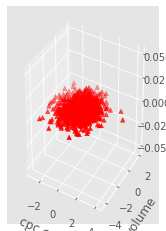

In [126]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(df["cpc"], df["volume de recherche"], c='r', marker='^')
 
ax.set_xlabel('cpc en euro')
ax.set_ylabel('volume')
 
plt.show()

In [253]:
df1.columns

Index(['index', 'Mot_clé', 'cpc', 'nombre de clic', 'nombre dimpression',
       'position moyenne', 'volume de recherche'],
      dtype='object')

In [128]:
# Convert Strings to Numbers
#df.cpc optimal = df.cpc optimal.str.replace("%", "").str.replace(",", ".").astype(float)
#df.position moyenne = df.position moyenne.str.replace(",", ".").astype(float)
#df['position moyenne'] = pd.to_numeric(df['position moyenne'])
#df['cpc optimal'] = pd.to_numeric(df['cpc optimal'])
#df = df.round(0)

In [129]:
# Show most Correlating Columns to cpc optimal
df.corr()["cpc"]

Mot_clé                0.007085
cpc                    1.000000
volume de recherche   -0.000933
Name: cpc, dtype: float64

In [255]:
# Define features and target
# features: what columns should algorithm take as base to make predictions
features = ["volume de recherche"]  # you can change features to see prediction changing
# target: what to predict
target = "cpc"

#"Mot_clé",

In [256]:
# Split Data in Train and Testset
train = df.sample(frac=0.8)
test =  df.loc[~df.index.isin(train.index)]

In [257]:
print ("Train rows: {}".format(len(train.index)))
print ("Test rows: {}".format(len(test.index)))

Train rows: 5
Test rows: 1


In [258]:
# Import different Alorithms to see differences between their predictions
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score

In [259]:
# Helper Function to print readable scores
def print_scores(scores):
    r = 1
    for score in scores:
        print("Run: {} - Score: {}".format(r, score))
        r += 1

In [260]:
# Model 1
# Define which Model to Use
LinearRegressionModel = LinearRegression()

In [261]:
# Train the Model
LinearRegressionModel.fit(train[features], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [262]:
# Test how the model performes against the Training data we split above...
prediction_score = LinearRegressionModel.score(test[features], test[target])
print("The score of prediction for LinearRegressionModel is: {}".format(prediction_score))

The score of prediction for LinearRegressionModel is: 0.0


In [264]:
# Print Predictions for all created Models

# Define parameters for Predictions 
# (in this case: what Cpc we have for a Keyword )
#Mot_clé = df["Robe"]

volume_de_recherche=300


data = [volume_de_recherche]  # needs to be same count as features

df_to_predict = pd.DataFrame(data = data, index=[0], columns=features)
res = LinearRegressionModel.predict(df_to_predict)
p= pd.DataFrame(print("LinearRegressionModel predicted:       {} comme CPC optimal".format(int(res[0]))))
p


LinearRegressionModel predicted:       765 comme CPC optimal


""


In [49]:
# Helper Function to plot Models
import matplotlib.pyplot as plt

def plt_indicateurs_from_to_cpc(models, features, from_indi, to_cpc, data):
    for model in models:
        predictions_x = []
        predictions_y = []
        positions = range(from_indi, to_cpc)
        for pos in positions:
            df_to_predict = pd.DataFrame(data = data, index=[0], columns=features)
            predictions_x.append(pos)
            predictions_y.append(model.predict(df_to_predict)[0])
        predictions_x, predictions_y
        plt.plot(predictions_x, predictions_y)

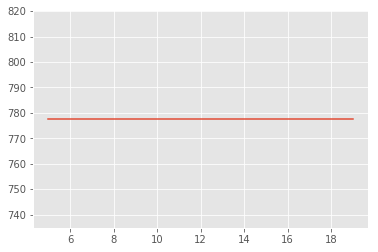

In [50]:
plt_indicateurs_from_to_cpc([LinearRegressionModel],features, 5, 20, data)